In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservation/Hotel-A-test.csv
/kaggle/input/hotel-reservation/Hotel-A-train.csv
/kaggle/input/hotel-reservation/Hotel-A-validation.csv
/kaggle/input/data-storm-20/DataStorm2.0_Q1-v2.pdf
/kaggle/input/data-storm-20/Hotel-A-test.csv
/kaggle/input/data-storm-20/Hotel-A-train.csv
/kaggle/input/data-storm-20/Hotel-A-validation.csv
/kaggle/input/data-storm-20/Hotel-A-data-dictionary.csv


**Libraries Imported**

In [2]:
import numpy as np
import pandas as pd
import warnings 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

**Reading Files**

In [3]:
import os
os.listdir('/kaggle/input/hotel-reservation')

['Hotel-A-test.csv', 'Hotel-A-train.csv', 'Hotel-A-validation.csv']

In [4]:
train = pd.read_csv('/kaggle/input/hotel-reservation/Hotel-A-train.csv')
validation = pd.read_csv('/kaggle/input/hotel-reservation/Hotel-A-validation.csv')
test = pd.read_csv('/kaggle/input/hotel-reservation/Hotel-A-test.csv')

**Exploratory data analysis**

Visualizing the data

Train data

In [5]:
train.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reservation-id,27499.0,5.016461e+07,2.886911e+07,3154.0,25239432.0,50149955.0,75182883.0,99999005.0
Age,27499.0,4.397745e+01,1.530315e+01,18.0,31.0,44.0,57.0,70.0
Adults,27499.0,2.333576e+00,1.176526e+00,1.0,2.0,2.0,3.0,5.0
Children,27499.0,1.743882e+00,7.219721e-01,1.0,1.0,2.0,2.0,3.0
Babies,27499.0,3.515401e-01,5.733259e-01,0.0,0.0,0.0,1.0,2.0
Discount_Rate,27499.0,1.249518e+01,1.120604e+01,0.0,5.0,10.0,20.0,40.0
Room_Rate,27499.0,1.751365e+02,4.387709e+01,100.0,137.0,175.0,214.0,250.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

In [8]:
train.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [9]:
train.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

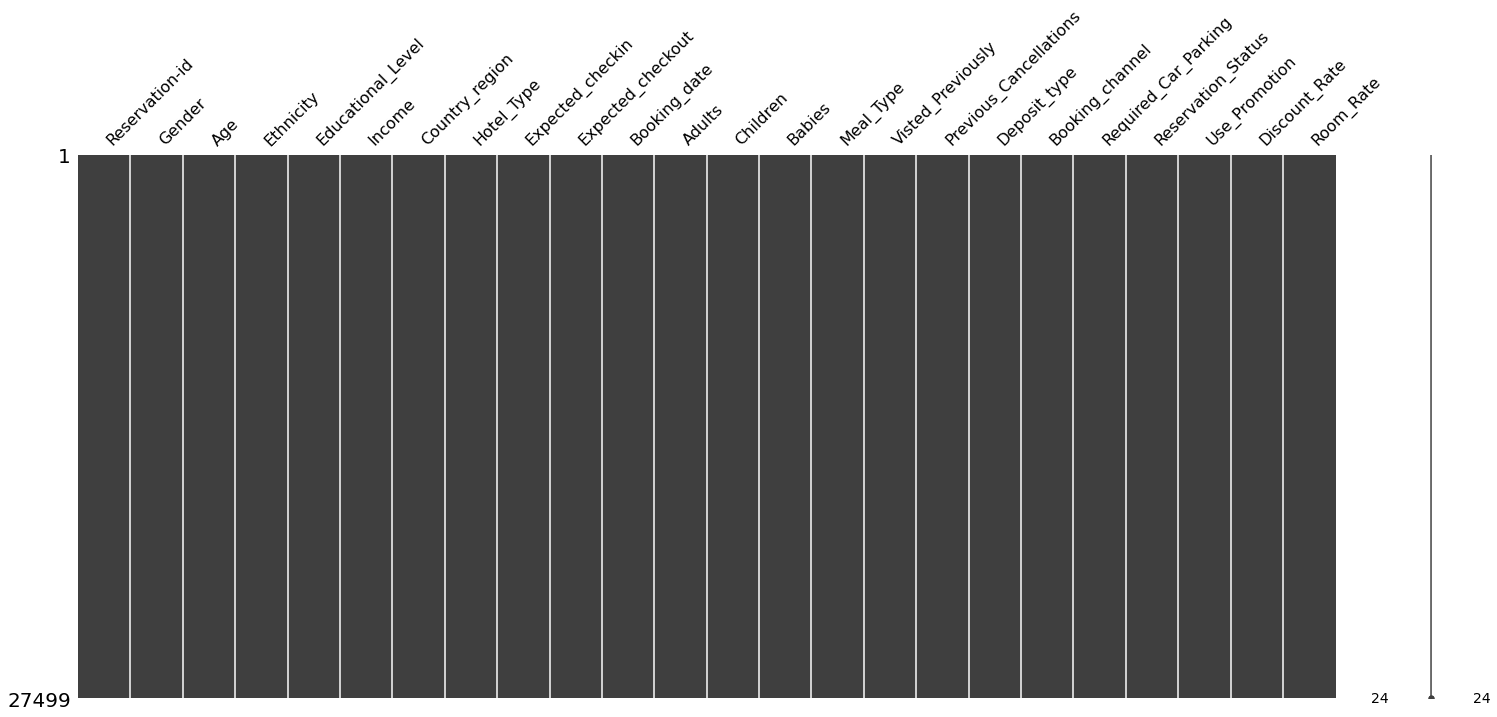

In [10]:
#visualizing missing data
import missingno as msno

msno.matrix(train)
plt.show()

Validation set

In [11]:
validation.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218


In [12]:
validation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reservation-id,2749.0,4.991827e+07,2.888011e+07,143.0,24843132.0,49328761.0,74712969.0,99988487.0
Age,2749.0,4.419680e+01,1.521221e+01,18.0,31.0,44.0,57.0,70.0
Adults,2749.0,2.336850e+00,1.185808e+00,1.0,1.0,2.0,3.0,5.0
Children,2749.0,1.740633e+00,7.249131e-01,1.0,1.0,2.0,2.0,3.0
Babies,2749.0,3.339396e-01,5.669973e-01,0.0,0.0,0.0,1.0,2.0
Discount_Rate,2749.0,1.248454e+01,1.116618e+01,0.0,5.0,10.0,20.0,40.0
Room_Rate,2749.0,1.737425e+02,4.388018e+01,100.0,136.0,173.0,212.0,250.0


In [13]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          2749 non-null   int64 
 1   Gender                  2749 non-null   object
 2   Age                     2749 non-null   int64 
 3   Ethnicity               2749 non-null   object
 4   Educational_Level       2749 non-null   object
 5   Income                  2749 non-null   object
 6   Country_region          2749 non-null   object
 7   Hotel_Type              2749 non-null   object
 8   Expected_checkin        2749 non-null   object
 9   Expected_checkout       2749 non-null   object
 10  Booking_date            2749 non-null   object
 11  Adults                  2749 non-null   int64 
 12  Children                2749 non-null   int64 
 13  Babies                  2749 non-null   int64 
 14  Meal_Type               2749 non-null   object
 15  Vist

In [14]:
validation.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [15]:
validation.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

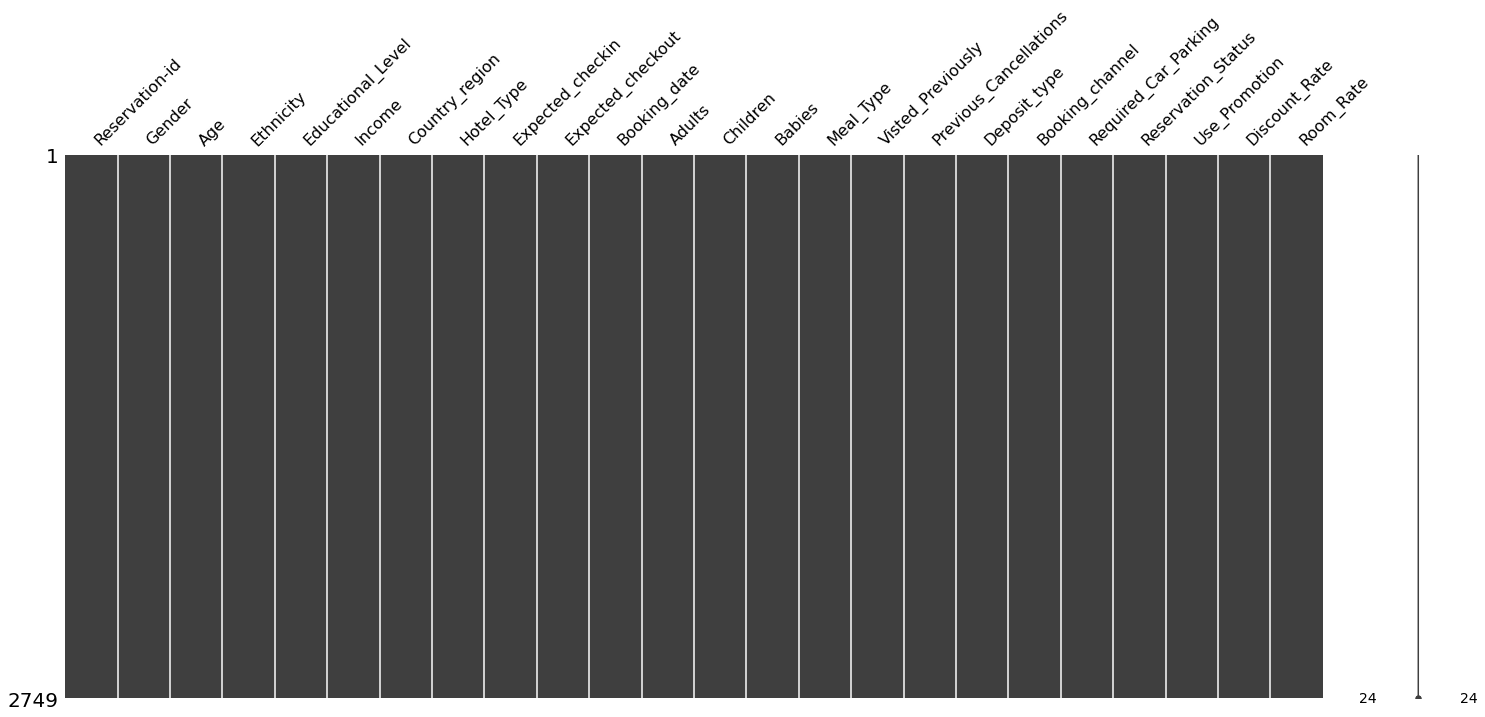

In [16]:
#visualizing missing data
import missingno as msno

msno.matrix(validation)
plt.show()

Test set

In [17]:
test.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

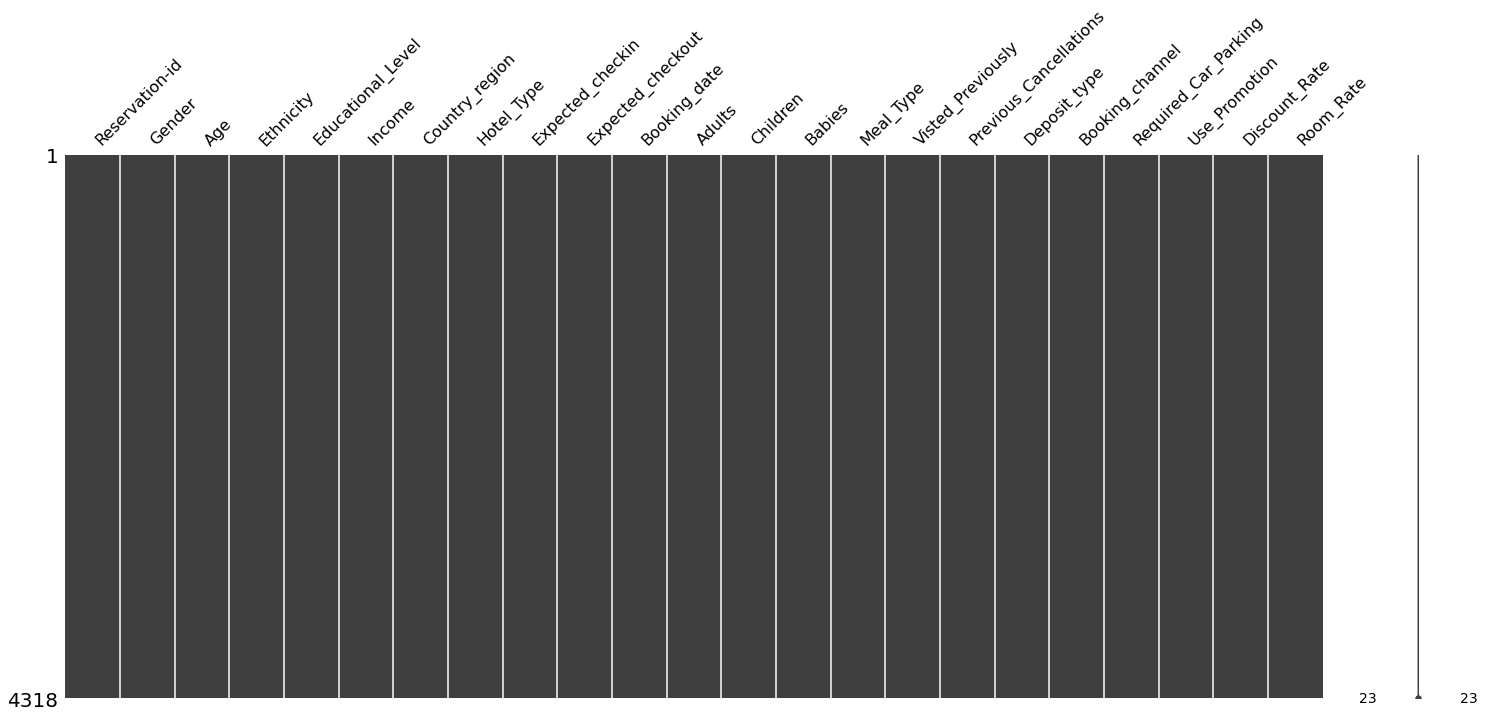

In [18]:
#visualizing missing data
import missingno as msno

msno.matrix(test)
plt.show()

Data preprocessing

In [19]:
train['Reservation_Status'].value_counts(normalize=True)*100

Check-In    77.239172
Canceled    15.033274
No-Show      7.727554
Name: Reservation_Status, dtype: float64

In [20]:
#change date to string and then to ordinal

#training data

train['Booking_date']= pd.to_datetime(train['Booking_date']).apply(lambda x: x.toordinal())
train['Expected_checkin']= pd.to_datetime(train['Expected_checkin']).apply(lambda x: x.toordinal())
train['Expected_checkout']= pd.to_datetime(train['Expected_checkout']).apply(lambda x: x.toordinal())


In [21]:
#validate

validation['Booking_date']= pd.to_datetime(validation['Booking_date']).apply(lambda x: x.toordinal())
validation['Expected_checkin']= pd.to_datetime(validation['Expected_checkin']).apply(lambda x: x.toordinal())
validation['Expected_checkout']= pd.to_datetime(validation['Expected_checkout']).apply(lambda x: x.toordinal())

In [22]:
#testing data

test['Booking_date']= pd.to_datetime(test['Booking_date']).apply(lambda x: x.toordinal())
test['Expected_checkin']= pd.to_datetime(test['Expected_checkin']).apply(lambda x: x.toordinal())
test['Expected_checkout']= pd.to_datetime(test['Expected_checkout']).apply(lambda x: x.toordinal())

In [23]:
#give values for categorical data
#validate and  train datasets



for x in [train,validation]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Reservation_Status'] = labelenc.fit_transform(x.Reservation_Status)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    

In [24]:
#test dataset

for x in [test]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    

In [25]:
X=  train.drop(['Reservation_Status'], axis=1)
Y = train['Reservation_Status']

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30)

In [27]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_jobs=-1)
RFclassifier.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
y_pred = RFclassifier.predict(X_val)

Accuracy is:  0.7727272727272727


<AxesSubplot:>

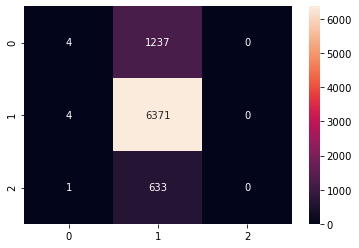

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

ac = accuracy_score(Y_val,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_val,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [30]:
print(confusion_matrix(Y_val, y_pred))

[[   4 1237    0]
 [   4 6371    0]
 [   1  633    0]]


In [31]:
print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.00      0.01      1241
           1       0.77      1.00      0.87      6375
           2       0.00      0.00      0.00       634

    accuracy                           0.77      8250
   macro avg       0.41      0.33      0.29      8250
weighted avg       0.66      0.77      0.67      8250



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
X_test = test

In [33]:
y_pred_test=RFclassifier.predict(X_test)

In [34]:
y_pred_test.shape

(4318,)

In [35]:
train.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)
test.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)

In [36]:
output = pd.DataFrame({'Reservation-id':test.Reservation_id.astype(np.int32), 'Reservation_Status':y_pred_test})
output.to_csv('my_submissionnew.csv', index=False)

Hyperparameter Tuning

In [37]:
X=  validation.drop(['Reservation_Status'], axis=1)
y = validation['Reservation_Status']

In [38]:
GridSearch = False

In [39]:

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

if GridSearch == True:
    param_grid = {'n_neighbors': np.arange(1,50), 'p':[1,2]}
    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, param_grid, cv=10)
    knn_cv.fit(X_train, y_train)
    print(knn_cv.best_params_)
    knn_cv.predict(X_val)
    print(knn_cv.score(X_val, y_val))

In [41]:
from sklearn.linear_model import LogisticRegression

if GridSearch == True:
    param_grid = {'C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'max_iter': [150,200,250, 300, 1000,1500], 'random_state':[1,123, 21,42,10] } 
    lr = LogisticRegression()
    lr_cv = GridSearchCV(lr, param_grid, cv=10)
    lr_cv.fit(X_train, y_train)
    print(lr_cv.best_params_)
    lr_cv.predict(X_val)
    print(lr_cv.score(X_val, y_val))


In [42]:
from sklearn.ensemble import RandomForestClassifier

if GridSearch == True:
    param_grid = {'n_estimators':[25,50,60],'max_features': [3,4,5], 'max_depth':[5,6,7], 'min_samples_leaf':[8,9,10,11],'random_state':[1,42] } 
    rf = RandomForestClassifier(n_jobs=-1)
    rf_cv =  GridSearchCV(rf, param_grid)
    rf_cv.fit(X_train, y_train)
    print(rf_cv.best_params_)
    rf_cv.predict(X_val)
    print(rf_cv.score(X_val, y_val))

In [43]:
from sklearn.linear_model import SGDClassifier

if GridSearch == True:
    param_grid = {'alpha':[0.01, 0.1,0.2, 1, 2],'max_iter': [70,75,80,90,120,150,200], 'random_state':[1,123, 21,42,10] } 
    sgd = SGDClassifier()
    sgd_cv =  GridSearchCV(sgd, param_grid, cv=5)
    sgd_cv.fit(X_train, y_train)
    print(sgd_cv.best_params_)
    sgd_cv.predict(X_val)
    print(sgd_cv.score(X_val, y_val))
    

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

if GridSearch == True:
    param_grid = {'base_estimator': [LogisticRegression(random_state=1), LogisticRegression(random_state=42), DecisionTreeClassifier()],'learning_rate':[0.1, 0.3, 0.6, 0.9, 1.1,1.3], 'n_estimators':[55,60,65,70],
                 'random_state':[1,123, 21,42,10]}
    adb = AdaBoostClassifier()
    adb_cv = GridSearchCV(adb, param_grid, cv=6)
    adb_cv.fit(X_train, y_train)
    print(adb_cv.best_params_)
    adb_cv.predict(X_val)
    print(adb_cv.score(X_val, y_val))

In [45]:
from sklearn.ensemble import BaggingClassifier

if GridSearch == True:
    param_grid = {'base_estimator': [LogisticRegression(random_state=1), DecisionTreeClassifier()],'max_features':[3,4,5,6],'max_samples':[30,40,50,60],
                  'n_estimators':[20,30,40,50],'random_state':[1,123, 21,42,10] } 

    bc = BaggingClassifier(n_jobs=-1)
    bc_cv = GridSearchCV(bc, param_grid, cv=5)
    bc_cv.fit(X_train, y_train)
    print(bc_cv.best_params_)
    bc_cv.predict(X_val)
    print(bc_cv.score(X_val, y_val))

In [46]:
import xgboost as xgb

if GridSearch == True:
    param_grid = {'n_estimators':[300,500,1000], 'objective':['binary:logistic'],'learning_rate':[0.1,1,1.5],'max_depth':[5,10,15] }
    #xgb_clf = xgb.XGBClassifier(base_score=0.5, objective='binary:logistic', n_estimators=300,seed=1, learning_rate=0.1, max_depth=10)
    xgb = xgb.XGBClassifier()
    xgb_cv =  GridSearchCV(xgb, param_grid, cv=5) 
    xgb_cv.fit(X_train, y_train)
    print(xgb_cv.best_params_)
    xgb_cv.predict(X_val)
    print(xgb_cv.score(X_val,y_val))

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=28, p=1)
lr = LogisticRegression(C=0.1,random_state=1, max_iter=150)
rf = RandomForestClassifier(n_estimators=50,max_features=4, max_depth=5, min_samples_leaf=11, random_state=1, n_jobs=-1)
sgd = SGDClassifier(alpha=0.1, max_iter=50, n_jobs=-1, random_state=0)
adb = AdaBoostClassifier(base_estimator=LogisticRegression(random_state=1),
                   learning_rate=0.9, n_estimators=21, random_state=1)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=40, n_estimators=20, random_state=1)
xgb_clf = xgb.XGBClassifier(base_score=0.5, objective='binary:logistic', n_estimators=1000,seed=1, learning_rate=1, max_depth=5)


classifiers = [('Logistic Regression', lr),
              ('Random Forest', rf),
              ('AdaBoostClassifier', adb),
              ('BaggingClassifier', bc)]  

for clf_name , clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print('{:s} : {:.4f}'.format(clf_name, accuracy_score(y_val, y_pred)))



Logistic Regression : 0.5843
Random Forest : 0.5843
AdaBoostClassifier : 0.5843
BaggingClassifier : 0.5727


In [48]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X, y)

y_pred = vc.predict(X_val)
print('VotingClassifier_score: {:.4f}'.format(vc.score(X_val, y_val)))

print('VotingClassifier: {:.4f}'.format(accuracy_score(y_val, y_pred)))

VotingClassifier_score: 0.5843
VotingClassifier: 0.5843


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[  0 182   0]
 [  0 402   0]
 [  0 104   0]]


In [50]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.58      1.00      0.74       402
           2       0.00      0.00      0.00       104

    accuracy                           0.58       688
   macro avg       0.19      0.33      0.25       688
weighted avg       0.34      0.58      0.43       688



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_pred.shape

(688,)

In [52]:
y_pred_test = vc.predict(X_test)

output = pd.DataFrame({'Reservation-id':test.Reservation_id.astype(np.int32), 'Reservation_Status':y_pred_test})
output.to_csv('my_submission.csv', index=False)

In [53]:
y_pred_test.shape

(4318,)